In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])

null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [4]:

df_train['Self_Employed'] = df_train['Self_Employed'].fillna(method = 'bfill')
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Dependents'] = df_train['Dependents'].fillna(method = 'bfill')
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [5]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(method = 'bfill')

In [6]:
df_train['Gender'] = df_train['Gender'].fillna(method = 'bfill')
df_train['Married'] = df_train['Married'].fillna(method = 'bfill')

In [7]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()


In [8]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1,'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [9]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [10]:
df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 62.4+ KB


In [12]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
#ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,dep,lat,pa],axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_train = df_train.drop(['Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [15]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Years              614 non-null uint8
30 Years             614 non-null uint8
40 Years             614 non-null uint8
5 Years              614 non-null uint8
7 Years              614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
ApplicantIncome      614 non-null float64
Coapplican

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [21]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 5)

In [23]:
#X_test and y_test are for validation:

In [18]:
## gini and max depth:

In [45]:
num = range(1,5,1)
for i in num:
    dec = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = i)
    dec.fit(X_train,y_train)
    ypred = dec.predict(X_train)
    score = accuracy_score(y_train,ypred)
    
    print('max_depth:',dec.tree_.max_depth)
    print('accuracy:',score)

max_depth: 1
accuracy: 0.7948717948717948
max_depth: 2
accuracy: 0.8041958041958042
max_depth: 3
accuracy: 0.8088578088578089
max_depth: 4
accuracy: 0.8135198135198135


In [34]:
#on training data:

In [43]:
cutoff_df = pd.DataFrame( columns = ['depth','accuracy','recall','precision','f1_score','false positive rate'])
from sklearn.metrics import confusion_matrix
num = range(15,23,1)
for i in num:
    dec = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = i)
    dec.fit(X_train,y_train)
    ypred = dec.predict(X_train)
    cm1 = metrics.confusion_matrix( y_train,ypred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
    fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,rec,pre,fsc,fpr]
print(cutoff_df)

    depth  accuracy    recall  precision  f1_score  false positive rate
15   15.0  0.948718  0.968504   0.872340  2.905512             0.059603
16   16.0  0.962704  0.984496   0.900709  2.953488             0.046667
17   17.0  0.981352  1.000000   0.943262  3.000000             0.027027
18   18.0  0.986014  0.965517   0.992908  2.896552             0.003521
19   19.0  0.993007  1.000000   0.978723  3.000000             0.010309
20   20.0  0.995338  0.986014   1.000000  2.958042             0.000000
21   21.0  0.997669  0.992958   1.000000  2.978873             0.000000
22   22.0  1.000000  1.000000   1.000000  3.000000             0.000000


<Figure size 1080x504 with 0 Axes>

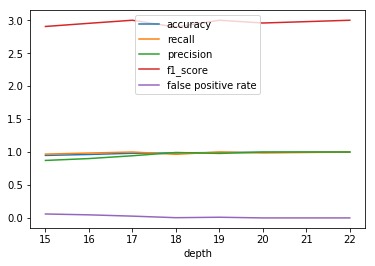

In [44]:
# Let's plot accuracy recall precision f1 score and false positive rate for various depths.
plt.figure(figsize = (15,7))
cutoff_df.plot.line(x='depth', y=['accuracy','recall','precision','f1_score','false positive rate'])

In [46]:
## entropy and parameters.

In [67]:
cutoff_df = pd.DataFrame( columns = ['depth','accuracy','recall','precision','f1_score','false positive rate'])
from sklearn.metrics import confusion_matrix
num = range(1,25,1)
for i in num:
    dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    dec.fit(X_train,y_train)
    ypred = dec.predict(X_train)
    cm1 = metrics.confusion_matrix( y_train,ypred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
    fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,rec,pre,fsc,fpr]
print(cutoff_df)

    depth  accuracy    recall  precision  f1_score  false positive rate
1     1.0  0.794872  0.907692   0.418440  2.723077             0.225275
2     2.0  0.797203  0.921875   0.418440  2.765625             0.224658
3     3.0  0.808858  0.927536   0.453901  2.782609             0.213889
4     4.0  0.811189  0.941176   0.453901  2.823529             0.213296
5     5.0  0.825175  0.945946   0.496454  2.837838             0.200000
6     6.0  0.827506  0.958904   0.496454  2.876712             0.199438
7     7.0  0.832168  0.972603   0.503546  2.917808             0.196629
8     8.0  0.848485  0.913043   0.595745  2.739130             0.169139
9     9.0  0.883450  0.882353   0.744681  2.647059             0.116129
10   10.0  0.906760  0.917355   0.787234  2.752066             0.097403
11   11.0  0.944056  0.953488   0.872340  2.860465             0.060000
12   12.0  0.953380  0.954887   0.900709  2.864662             0.047297
13   13.0  0.967366  0.992248   0.907801  2.976744             0

<Figure size 1080x504 with 0 Axes>

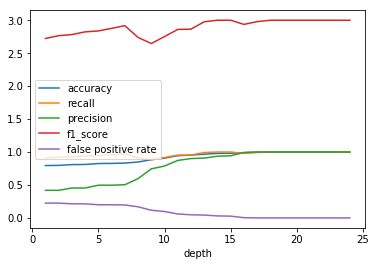

In [69]:
# Let's plot accuracy recall precision f1 score and false positive rate for various depths.
plt.figure(figsize = (15,7))
cutoff_df.plot.line(x='depth', y=['accuracy','recall','precision','f1_score','false positive rate'])

In [73]:
cutoff_df

,depth,accuracy,recall,precision,f1_score,false positive rate
1,1.0,0.794872,0.907692,0.418440,2.723077,0.225275
2,2.0,0.797203,0.921875,0.418440,2.765625,0.224658
3,3.0,0.808858,0.927536,0.453901,2.782609,0.213889
4,4.0,0.811189,0.941176,0.453901,2.823529,0.213296
5,5.0,0.825175,0.945946,0.496454,2.837838,0.200000
6,6.0,0.827506,0.958904,0.496454,2.876712,0.199438
7,7.0,0.832168,0.972603,0.503546,2.917808,0.196629
8,8.0,0.848485,0.913043,0.595745,2.739130,0.169139
9,9.0,0.883450,0.882353,0.744681,2.647059,0.116129
10,10.0,0.906760,0.917355,0.787234,2.752066,0.097403


In [55]:
## now computing validation segment:

In [60]:
cutoff_df1 = pd.DataFrame( columns = ['depth','accuracy','recall','precision','f1_score','false positive rate'])
from sklearn.metrics import confusion_matrix
num = range(1,25,1)
for i in num:
    dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    dec.fit(X_train,y_train)
    ypred1 = dec.predict(X_test)
    cm1 = metrics.confusion_matrix( y_test,ypred1)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
    fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,accuracy,rec,pre,fsc,fpr]
print(cutoff_df1)

    depth  accuracy    recall  precision  f1_score  false positive rate
1     1.0  0.821622  0.781250   0.490196  2.343750             0.169935
2     2.0  0.821622  0.781250   0.490196  2.343750             0.169935
3     3.0  0.821622  0.781250   0.490196  2.343750             0.169935
4     4.0  0.821622  0.781250   0.490196  2.343750             0.169935
5     5.0  0.810811  0.735294   0.490196  2.205882             0.172185
6     6.0  0.810811  0.735294   0.490196  2.205882             0.172185
7     7.0  0.805405  0.727273   0.470588  2.181818             0.177632
8     8.0  0.794595  0.666667   0.509804  2.000000             0.171233
9     9.0  0.762162  0.577778   0.509804  1.733333             0.178571
10   10.0  0.751351  0.558140   0.470588  1.674419             0.190141
11   11.0  0.735135  0.519231   0.529412  1.557692             0.180451
12   12.0  0.729730  0.509091   0.549020  1.527273             0.176923
13   13.0  0.745946  0.535714   0.588235  1.607143             0

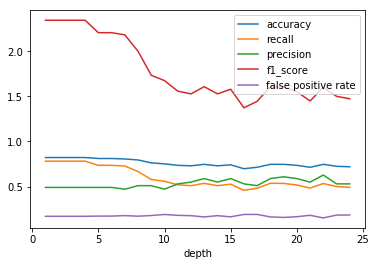

In [61]:
cutoff_df1.plot.line(x='depth', y=['accuracy','recall','precision','f1_score','false positive rate'])

In [72]:
cutoff_df1

,depth,accuracy,recall,precision,f1_score,false positive rate
1,1.0,0.821622,0.781250,0.490196,2.343750,0.169935
2,2.0,0.821622,0.781250,0.490196,2.343750,0.169935
3,3.0,0.821622,0.781250,0.490196,2.343750,0.169935
4,4.0,0.821622,0.781250,0.490196,2.343750,0.169935
5,5.0,0.810811,0.735294,0.490196,2.205882,0.172185
6,6.0,0.810811,0.735294,0.490196,2.205882,0.172185
7,7.0,0.805405,0.727273,0.470588,2.181818,0.177632
8,8.0,0.794595,0.666667,0.509804,2.000000,0.171233
9,9.0,0.762162,0.577778,0.509804,1.733333,0.178571
10,10.0,0.751351,0.558140,0.470588,1.674419,0.190141


In [92]:
xax = range(1,25,1)
f1 = pd.concat([cutoff_df.accuracy,cutoff_df1.accuracy],1)
f1.columns = ['acc_train','acc_validate']
df1 = pd.DataFrame({'index': xax})
f1 = pd.concat([f1,df1],1)
f1 = f1.dropna()
f1.head()

,acc_train,acc_validate,index
1,0.794872,0.821622,2.0
2,0.797203,0.821622,3.0
3,0.808858,0.821622,4.0
4,0.811189,0.821622,5.0
5,0.825175,0.810811,6.0


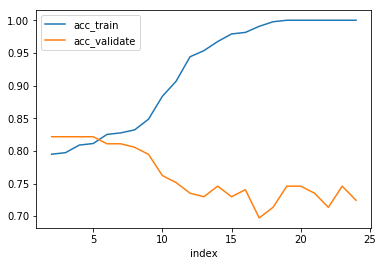

In [93]:
f1.plot.line(x ='index',y = ['acc_train','acc_validate'])

In [94]:
## finally decided that the criterion is entropy and cutoff is 5:

In [163]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=27)

In [174]:
# Do k-fold cross-validation
dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
cv_results = cross_val_score(dec,X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [175]:
# Calculate mean
cv_results.mean()

0.7902051983584131

In [176]:
### now predicting the value:

In [177]:
#X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
#y = df_train['Loan_Status']

In [178]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [179]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [180]:

df_test['Credit_History'] = df_test['Credit_History'].fillna(method = 'bfill')
df_test['Gender'] = df_test['Gender'].fillna(method = 'bfill')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(method = 'bfill')
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Dependents'] = df_test['Dependents'].fillna(method = 'bfill')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [181]:
## continous variables:
features1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df1 = df_test[features1]
normalized_df1 = normalized_df1 - normalized_df1.mean()/normalized_df1.std()

In [182]:
df_test['Education'] =df_test['Education'].map({'Graduate':1,'Not Graduate':0}) 
df_test['Gender'] = df_test['Gender'].map({'Male': 1,'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1,'No': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1,'No': 0})
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',350.0:'29 Years',12.0:'1 Year',6.0:'half Year'})

In [183]:
df_test = df_test.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [184]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen1 = pd.get_dummies(df_test['Gender'],drop_first = True)
dep1 = pd.get_dummies(df_test['Dependents'],drop_first = True)
#ed1 = pd.get_dummies(df_test['Education'],drop_first = True)
#lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
pa1 = pd.get_dummies(df_test['Property_Area'],drop_first = True)
lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)

df_test = pd.concat([df_test,pa1,lat1,dep1],axis = 1)

In [185]:
df_test1 = df_test.drop(['Loan_ID','Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)
df_test1 = pd.concat([df_test1,normalized_df1],axis = 1)

In [186]:
df_test1 = df_test1.drop(['half Year'],1)

In [187]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 22 columns):
Gender               367 non-null int64
Married              367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
Credit_History       367 non-null float64
Semiurban            367 non-null uint8
Urban                367 non-null uint8
10 Years             367 non-null uint8
15 Years             367 non-null uint8
20 Years             367 non-null uint8
25 Years             367 non-null uint8
29 Years             367 non-null uint8
3 Years              367 non-null uint8
30 Years             367 non-null uint8
40 Years             367 non-null uint8
7 Years              367 non-null uint8
dep_None             367 non-null uint8
dep_One              367 non-null uint8
dep_Two              367 non-null uint8
ApplicantIncome      367 non-null float64
CoapplicantIncome    367 non-null float64
LoanAmount           367 non-null float64
dtypes:

In [194]:
dec = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
dec.fit(X_train,y_train)
y_pred = dec.predict(df_test1)

In [195]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [196]:
y_pred_df= y_pred_df.rename(columns={ 0 : 'Loan_Status'})
y_pred_df.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [197]:
loan = pd.DataFrame(df_test['Loan_ID'])

In [198]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,y_pred_df],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [199]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('decisiontreetry4.csv', index = False)